House 762, Fidelity 238


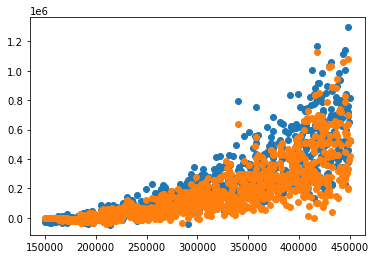

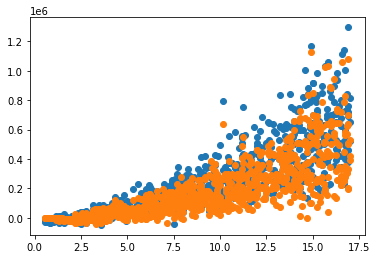

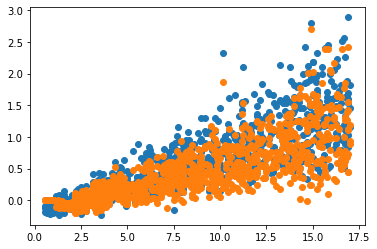

'\nPF = False\nrentHouse = False\nyears = 30        \nindexFundInterest, houseIndex, inflation = economicEngine(years) \naskingPrice = 125000\ncashAvailable = 20000\nmonthlyPayment = 700\nyears, months, days, netGain1 = mortgage(askingPrice, cashAvailable, monthlyPayment, houseIndex, rentHouse, PF)\nnetGain2 = mutualFunds(cashAvailable, monthlyPayment, indexFundInterest, years, months, days, PF)\n'

In [89]:
''' 
Is it better to buy a house, even in a rising market, or is it better to cross fingers and hope prices fall?
And if buying now is a good idea, is it better to go for something in the region of $150,000 and pay cash, 
or is it better to borrow a lot?""

'''
import numpy as np
import random

def print2(msg, PF):
    if PF:
        print(msg+'\n')

def economicEngine(years):
    indexFundInterest = []
    houseIndex = []
    inflation = []
    for y in range(years):
        if y==0:
            good_or_bad = -0.2
        else:
            good_or_bad = np.random.normal(0.0, 0.1, 1)
        indexFundInterest.append(np.random.normal(1.10+good_or_bad, 0.05, 1))
        #houseIndex.append(np.random.normal(1.062+good_or_bad, 0.06, 1)) # 1.062 based on 38 year Nationwide index
        houseIndex.append(np.random.normal((indexFundInterest[y]-1.0)*0.6+1.0, 0.03, 1))
        inflation.append(np.random.normal(1.025+good_or_bad/10, 0.01, 1))
    return indexFundInterest, houseIndex, inflation

def mortgage(askingPrice, cashAvailable, monthlyPayment, houseIndex, rentHouse, PF):
    print2('BUY A HOME', PF)
    home={}
    home['askingPrice']=askingPrice
    home['value']=home['askingPrice']/1.03
    home['buyingFees']=0.07 * home['askingPrice']
    home['propertyTax']=home['value']/50
    home['taxesPaid']=0
    
    mortgage = {}
    mortgage['interestRate']=1.025
    mortgage['duration']=30
    mortgage['payment']=monthlyPayment
    mortgage['totalPaid']=0.0
    mortgage['downpayment']=cashAvailable-home['buyingFees']
    mortgage['loanAmount']=home['askingPrice']-mortgage['downpayment']
    mortgage['total']=mortgage['loanAmount']
    
    rent={}
    rent['rate']=1.05
    rent['monthly']=home['value']*(np.power(rent['rate'],1/12)-1.0)
    rent['totalEarned']=0
    rent['rateIncrease']=1.02 # raise by 2% per year
    
    totalPaid = 0
    
    print2('Buying a house.\nAsking price: %.0f' % home['askingPrice'], PF)
    print2('Downpayment: %.0f' % mortgage['downpayment'], PF)
    print2('Loan amount: %.0f' % mortgage['loanAmount'], PF)
    
    totalPaid = cashAvailable
    netGain = 0
    paidOff = False
    print2('years, value, mortgage, equity, netGain, housePriceIndex', PF)
    for y in range(len(houseIndex)):
        home['propertyTax']=home['value']/50
        if paidOff==False:
            for m in range(1,13):
                mortgage['total']=mortgage['total']*np.power(mortgage['interestRate'],1/12)
                if mortgage['total']<mortgage['payment']:
                    days=int(mortgage['total']/mortgage['payment']*30)
                    mortgage['payment']=mortgage['total']
                    paidOff = True
                    year = y
                    month = m
                mortgage['totalPaid']+=mortgage['payment']
                mortgage['total'] = mortgage['total'] - mortgage['payment']
                try:
                    home['value'] = home['value']*np.power(houseIndex[y],1/12)
                except:
                    print(len(houseIndex), y)
                home['taxesPaid']+=home['propertyTax']/12
                totalPaid += (home['propertyTax']/12 + mortgage['payment'])
                if rentHouse:
                    rent['totalEarned']+=rent['monthly']
            home['equity'] = home['value'] - mortgage['total']
            netGain = home['equity'] - totalPaid + rent['totalEarned']
            print2('%2d, %7d, %7d, %7d, %7d, %5.3f' % (y, home['value'], mortgage['total'], home['equity'],netGain,houseIndex[y-1] ), PF)
        rent['monthly']*=rent['rateIncrease']
        
    print2('Paid off after %d years, %d months, %d days' %(year,month,days), PF)
    print2('Total mortgage paid: %.0f' % mortgage['totalPaid'], PF)
    print2('Total taxes paid: %.0f' % (home['taxesPaid']), PF)
    print2('Total rent earned: %.0f' % (rent['totalEarned']), PF)
    print2('Total paid: %.0f' % (mortgage['totalPaid'] + mortgage['downpayment'] + home['taxesPaid']), PF)
    print2('Total assets in home: from original %.0f and monthly payment of %.0f, now have %.0f' % (cashAvailable, monthlyPayment, home['value']), PF)
    netGain = home['equity'] - totalPaid + rent['totalEarned']
    print2('Net Gain = %.0f\n' % netGain, PF)
    return year, month, days, netGain

def mutualFunds(cashAvailable, monthlyPayment, indexFundInterest, years, months, days, PF):
    print2('MUTUAL FUNDS', PF)
    totalPaid = 0
    stocksPercentage = 0.7 # 0.7=70%
    MF={}
    MF['total']=cashAvailable
    totalPaid = cashAvailable
    for y in range(years):
        for m in range(1,13):
            MFinterest = (indexFundInterest[y]-1.0)*stocksPercentage+1.0
            totalPaid += monthlyPayment
            MF['total']=MF['total']*np.power((indexFundInterest[y]-1)*stocksPercentage+1.0,1/12)+monthlyPayment
        print2('%2d, %7d, %5.3f' % (y, MF['total'],MFinterest ), PF)
    print2('Total paid into mutual funds: %.0f' % totalPaid, PF )
    print2('Total assets in mutual funds: from original %.0f and monthly payment of %.0f, now have %.0f' % (cashAvailable, monthlyPayment, MF['total']), PF)
    netGain = (MF['total']-totalPaid)
    print2('Net Gain = %.0f\n' % netGain, PF )
    return netGain
    

def montecarlo():
    rentHouse = True #True
    PF = False # print flag
    futureYears = 50
    houseWins = 0
    fidelityWins = 0
    a = []
    n1 = []
    n2 = []
    y = []
    r1 = []
    r2 = []
    for trials in range(1000):
        indexFundInterest, houseIndex, inflation = economicEngine(futureYears) 
        cashAvailable = 150000
        askingPrice = cashAvailable * (1.0 + random.uniform(0, 1)*2)
        monthlyPayment = 2000
        years, months, days, netGain1 = mortgage(askingPrice, cashAvailable, monthlyPayment, houseIndex, rentHouse, PF)
        netGain2 = mutualFunds(cashAvailable, monthlyPayment, indexFundInterest, years, months, days, PF)
        if netGain1 > netGain2:
            houseWins += 1
        else:
            fidelityWins += 1
        a.append(askingPrice)
        n1.append(netGain1)
        n2.append(netGain2)
        r1.append(netGain1/askingPrice)
        r2.append(netGain2/askingPrice)
        y.append(years+months/12)
    print('House %d, Fidelity %d' % (houseWins, fidelityWins))
    
    import matplotlib.pyplot as plt
    plt.figure()
    plt.scatter(a, n1)
    plt.scatter(a, n2)
    plt.show()
    plt.figure()
    plt.scatter(y, n1)
    plt.scatter(y, n2)
    plt.show()    
    plt.figure()
    plt.scatter(y, r1)
    plt.scatter(y, r2)
    plt.show()    

montecarlo()
'''
PF = False
rentHouse = False
years = 30        
indexFundInterest, houseIndex, inflation = economicEngine(years) 
askingPrice = 125000
cashAvailable = 20000
monthlyPayment = 700
years, months, days, netGain1 = mortgage(askingPrice, cashAvailable, monthlyPayment, houseIndex, rentHouse, PF)
netGain2 = mutualFunds(cashAvailable, monthlyPayment, indexFundInterest, years, months, days, PF)
'''

Need to do a Monte Carlo simulation, and make this more realistic. I have added a big drop in year 1.

Lessons learned so far:
1. Invest all available assets in real estate or Fidelity funds, except for 6 months rainy day fund.
2. Real estate can win if property rented out (76%). Otherwise, Fidelity better (96%).
3. Maximum gain is from buying and renting out real estate.
Buy a house in Fairbanks that I can easily rent out and is attractive to military. Ideally a 3+ bedroom, 1.5+. bathroom, 2 garage home, where I can also have a cabin.